<a href="https://colab.research.google.com/github/jiseongpark/BiS800_PJ3/blob/master/BiS800_Project_3__20203265_Park_Ji_Seong.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**[WARNING]**

**If you run the code, you cannot use the given P(AMP) files**

If so, you should generate the P(AMP) values again.

The generation procedure is written in README file.

#### 0 Environment Setting

In [1]:
%%bash
PYV=`python -c "import sys;t='{v[0]}.{v[1]}'.format(v=list(sys.version_info[:2]));sys.stdout.write(t)";`
echo "Python version $PYV detected"
if [ $PYV == "2.7" ]
then
  # Installing DeepChem for Python 2.7.
  apt-get install -y libxrender-dev
  apt-get install python-rdkit librdkit1 rdkit-data       # Install RDkit

  pip install joblib simdna

  git clone https://github.com/deepchem/deepchem.git      # Clone deepchem source code from GitHub
  cd deepchem && python setup.py install  

  ls -la /usr/local/lib/python2.7/dist-packages/deepchem/
else
  # Installing DeepChem for Python 3.6 using MiniConda.
  wget https://repo.continuum.io/miniconda/Miniconda3-4.3.31-Linux-x86_64.sh -O anaconda.sh;
  chmod +x anaconda.sh
  bash ./anaconda.sh -b -f -p /usr/local
#   conda install -y --prefix /usr/local -c conda-forge rdkit joblib simdna

#   git clone https://github.com/deepchem/deepchem.git      # Clone deepchem source code from GitHub
#   cd deepchem && python setup.py install
#   ls -la /usr/local/lib/python3.6/site-packages/deepchem
fi

Python version 3.6 detected
PREFIX=/usr/local
installing: python-3.6.3-h6c0c0dc_5 ...
installing: ca-certificates-2017.08.26-h1d4fec5_0 ...
installing: conda-env-2.6.0-h36134e3_1 ...
installing: libgcc-ng-7.2.0-h7cc24e2_2 ...
installing: libstdcxx-ng-7.2.0-h7a57d05_2 ...
installing: libffi-3.2.1-hd88cf55_4 ...
installing: ncurses-6.0-h9df7e31_2 ...
installing: openssl-1.0.2n-hb7f436b_0 ...
installing: tk-8.6.7-hc745277_3 ...
installing: xz-5.2.3-h55aa19d_2 ...
installing: yaml-0.1.7-had09818_2 ...
installing: zlib-1.2.11-ha838bed_2 ...
installing: libedit-3.1-heed3624_0 ...
installing: readline-7.0-ha6073c6_4 ...
installing: sqlite-3.20.1-hb898158_2 ...
installing: asn1crypto-0.23.0-py36h4639342_0 ...
installing: certifi-2017.11.5-py36hf29ccca_0 ...
installing: chardet-3.0.4-py36h0f667ec_1 ...
installing: idna-2.6-py36h82fb2a8_1 ...
installing: pycosat-0.6.3-py36h0a5515d_0 ...
installing: pycparser-2.18-py36hf9f622e_1 ...
installing: pysocks-1.6.7-py36hd97a5b1_1 ...
installing: ruamel_

--2020-05-10 07:38:47--  https://repo.continuum.io/miniconda/Miniconda3-4.3.31-Linux-x86_64.sh
Resolving repo.continuum.io (repo.continuum.io)... 104.18.200.79, 104.18.201.79, 2606:4700::6812:c94f, ...
Connecting to repo.continuum.io (repo.continuum.io)|104.18.200.79|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://repo.anaconda.com/miniconda/Miniconda3-4.3.31-Linux-x86_64.sh [following]
--2020-05-10 07:38:47--  https://repo.anaconda.com/miniconda/Miniconda3-4.3.31-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.130.3, 104.16.131.3, 2606:4700::6810:8303, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.130.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 57669415 (55M) [application/x-sh]
Saving to: ‘anaconda.sh’

     0K .......... .......... .......... .......... ..........  0% 43.6M 1s
    50K .......... .......... .......... .......... ..........  0% 7.38M 4s
   100K 

In [0]:
import sys
if sys.version_info[0] >= 3:
    sys.path.append('/usr/local/lib/python3.6/site-packages/')
sys.path

import os
import tensorflow as tf
import tensorflow.python.util.deprecation as deprecation
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
deprecation._PRINT_DEPRECATION_WARNINGS = False
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)


In [3]:
!pip install modlamp

    100% |████████████████████████████████| 8.0MB 141kB/s 
    100% |████████████████████████████████| 163kB 7.3MB/s 
    100% |████████████████████████████████| 20.2MB 59kB/s 
    100% |████████████████████████████████| 26.1MB 50kB/s 
    100% |████████████████████████████████| 12.4MB 103kB/s 
    100% |████████████████████████████████| 7.1MB 185kB/s 
    100% |████████████████████████████████| 10.0MB 127kB/s 
    100% |████████████████████████████████| 5.8MB 224kB/s 
    100% |████████████████████████████████| 92kB 3.8MB/s 
    100% |████████████████████████████████| 71kB 10.1MB/s 
    100% |████████████████████████████████| 235kB 3.8MB/s 
    100% |████████████████████████████████| 296kB 4.0MB/s 
    100% |████████████████████████████████| 512kB 2.6MB/s 
  Running setup.py bdist_wheel for modlamp ... done
  Stored in directory: /root/.cache/pip/wheels/a8/fd/e0/d87da8820407ab9b1bc4725bf63b0fcdd63281490e902a2678
Successfully built modlamp


## 1 Load Data

#### retrieve data

In [4]:
!git clone https://github.com/alexarnimueller/LSTM_peptides.git

Cloning into 'LSTM_peptides'...
remote: Enumerating objects: 247, done.
remote: Total 247 (delta 0), reused 0 (delta 0), pack-reused 247
Receiving objects: 100% (247/247), 254.58 KiB | 819.00 KiB/s, done.
Resolving deltas: 100% (141/141), done.


import data to pandas dataframe

In [5]:
from __future__ import division
from __future__ import print_function
from __future__ import unicode_literals

import numpy as np 
import tensorflow as tf
import sklearn
import pandas as pd
import random

df = pd.read_csv('LSTM_peptides/training_sequences_noC.csv', names=['seq'])
df['seq']

0                  SLGGFLKGVGKALAGVGKMVADQFGNLLQAGQ
1           FALLGDFFRKSKEKIGKEFKRIVQRIKDFLRNLVPRTES
2                                    KQIKMKLREMVLFT
3                                     FIGAIARLLSKIF
4                                           KPPAWVP
                           ...                     
1549                    SIGAKILGGVKTFFKGALKELASTYLQ
1550                    GIGSAILSAGKSALKGLAKGLAEHFAN
1551                      GIGAAILSAGKSIIKGLANGLAEHF
1552                                ILPLIASLIGGLLGK
1553    MGAIAKLVAKFGWPFIKKFYKQIMQFIGQGWTIDQIEKWLKRH
Name: seq, Length: 1554, dtype: object

#### preprocess

data statistics

In [6]:
total = ''
length = []
for seq in df['seq']:
    total += seq
    length.append(len(seq))

aminoacid = sorted(set(total))
aminoacid.insert(0, 'b')
# aminoacid.insert(0, 'x')
aminoacid.insert(0, ' ')
# aminoacid.append('<e>')
vocab = aminoacid
print('statistics')
print('vocab: ', vocab, ' length : ', len(vocab))
print('max length: ', max(length))

statistics
vocab:  [' ', 'b', 'A', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y']  length :  21
max length:  48


In [7]:
# vectorizing data
def vectorize(seq):
    encode = []
    encode.append([1 if i == 1 else 0 for i in range(21)])
    for aa in seq:
        encode.append([1 if i == vocab.index(aa) else 0 for i in range(21)])
    # encode.append([1 if i == 1 else 0 for i in range(22)])
    for _ in range(49 - len(encode)):
        encode.append([1 if i == 0 else 0 for i in range(21)])
    return np.array(encode)

vect = []
for seq in df['seq']:
    vect.append(vectorize(seq))
random.shuffle(vect)

# split training input and its target
def split_input_target(chunk):
    input_text = chunk[:-1]
    target_text = chunk[1:]
    return input_text, target_text

x_in, y_out = [], []
for seq in vect:
    x, y = split_input_target(seq)
    x_in.append(x)
    y_out.append(y)
X_train = np.array(x_in[:])
X_test = np.array(x_in[1300:])
y_train = np.array(y_out[:])
y_test = np.array(y_out[1300:])
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)


(1554, 48, 21) (1554, 48, 21)
(254, 48, 21) (254, 48, 21)


## 2 Build RNN for designing AMP

#### build model

model architecture

> LSTM(256) -> Dropout(0.2) -> LSTM(256) -> Dropout(0.4) -> Dense(64) -> Dense_output





In [0]:
def build_model(vocab_size, embed_dim, rnn_units, batch, input_shape):
    model = tf.keras.Sequential([
                                 tf.keras.layers.Input(shape=[None, 21]),
                                #  tf.keras.layers.Embedding(vocab_size, embed_dim),
                                 tf.keras.layers.LSTM(rnn_units[0], return_sequences=True, recurrent_initializer='glorot_normal', activation='tanh'),
                                 tf.keras.layers.Dropout(0.2),
                                 tf.keras.layers.LSTM(rnn_units[1], return_sequences=True, recurrent_initializer='glorot_normal', activation='tanh'),
                                 tf.keras.layers.Dropout(0.4),
                                 tf.keras.layers.Dense(64),
                                 tf.keras.layers.Dense(vocab_size, activation='softmax')
    ])
    return model

fine tuning
* epoch: 30 -> 50 -> 100 -> 150 (best at 75epoch)
* batch: 32 -> 10 -> 30 -> 50 -> 100 -> 50 (50 and 100 are almost the same)
* architecture: single layer -> double layers with double dropouts (reference paper recommendation)
* rnn unit: 32 -> (32,64) -> (32,128) -> (256,256) (reference paper recommendation)
* embedding layer applied -> self one-hot encoded data applied 

In [9]:
# Model Hyperparameter
RNN_UNIT = [256, 256]     # number of RNN unit for each layer
VOCAB_SIZE = len(vocab)     # len(vocab) (CONSTANT do not modify)
EMBED_DIM = 21       # embedding dimension
BATCH_SIZE = 50     # batch size
BUF_SIZE = 100      # buffer size for shuffle the data
EPOCH = 80          # epoch
INPUT_SHAPE = 48


model = build_model(VOCAB_SIZE, EMBED_DIM, RNN_UNIT, BATCH_SIZE, INPUT_SHAPE)

loss = tf.keras.losses.categorical_crossentropy

model.compile(optimizer='adam', loss=loss, metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, None, 256)         284672    
_________________________________________________________________
dropout (Dropout)            (None, None, 256)         0         
_________________________________________________________________
lstm_1 (LSTM)                (None, None, 256)         525312    
_________________________________________________________________
dropout_1 (Dropout)          (None, None, 256)         0         
_________________________________________________________________
dense (Dense)                (None, None, 64)          16448     
_________________________________________________________________
dense_1 (Dense)              (None, None, 21)          1365      
Total params: 827,797
Trainable params: 827,797
Non-trainable params: 0
__________________________________________________

#### training

checkpoint saver

In [0]:
import os

# Directory where the checkpoints will be saved
checkpoint_dir = './training_checkpoints'

# Name of the checkpoint files
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt_{epoch}")

checkpoint_callback=tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_prefix,
    save_weights_only=True)

In [11]:
from matplotlib import pyplot as plt
print(X_train.shape, y_train.shape)
history = model.fit(x=X_train, y=y_train, epochs=EPOCH, batch_size=BATCH_SIZE, validation_split=0.2, callbacks=[checkpoint_callback])


(1554, 48, 21) (1554, 48, 21)
Epoch 1/80
25/25 [==============================] - 2s 80ms/step - loss: 1.7069 - accuracy: 0.5419 - val_loss: 1.3781 - val_accuracy: 0.5749
Epoch 2/80
25/25 [==============================] - 1s 39ms/step - loss: 1.3388 - accuracy: 0.5919 - val_loss: 1.2616 - val_accuracy: 0.6206
Epoch 3/80
25/25 [==============================] - 1s 39ms/step - loss: 1.2599 - accuracy: 0.6192 - val_loss: 1.2177 - val_accuracy: 0.6249
Epoch 4/80
25/25 [==============================] - 1s 39ms/step - loss: 1.2249 - accuracy: 0.6255 - val_loss: 1.1934 - val_accuracy: 0.6358
Epoch 5/80
25/25 [==============================] - 1s 39ms/step - loss: 1.2012 - accuracy: 0.6268 - val_loss: 1.1745 - val_accuracy: 0.6313
Epoch 6/80
25/25 [==============================] - 1s 38ms/step - loss: 1.1850 - accuracy: 0.6280 - val_loss: 1.1513 - val_accuracy: 0.6356
Epoch 7/80
25/25 [==============================] - 1s 40ms/step - loss: 1.1659 - accuracy: 0.6324 - val_loss: 1.1365 - val_

MIN Loss:  0.6515645384788513 	last Loss:  0.6859706044197083


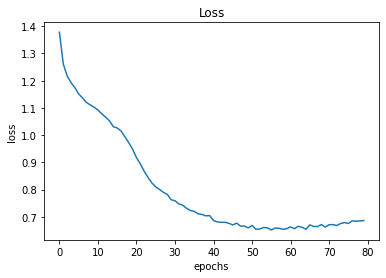

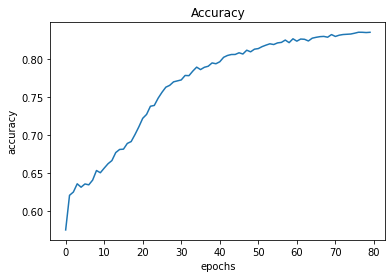

In [12]:
print('MIN Loss: ', min(history.history['val_loss']), '\tlast Loss: ', history.history['val_loss'][-1])

plt.plot(range(EPOCH), history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('Loss')
plt.show()

plt.plot(range(EPOCH), history.history['val_accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('Accuracy')
plt.show()

## 3 Generate new AMP and Test property

text generator

In [0]:
def _onehotencode(s, vocab=None):  
    # generate translation dictionary for one-hot encoding
    to_one_hot = dict()
    for i, a in enumerate(vocab):
        v = np.zeros(len(vocab))
        v[i] = 1
        to_one_hot[a] = v
    
    result = []
    for l in s:
        result.append(to_one_hot[l])
    result = np.array(result)
    return np.reshape(result, (1, result.shape[0], result.shape[1])), to_one_hot, vocab

In [0]:
from progressbar import ProgressBar

def gen_seq(model, num=1000, temp=1.0):
    vocab = [' ', 'b', 'A', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'W',
                 'Y']
    print("\nSampling...\n")
    sampled = []
    lcntr = 0
    pbar = ProgressBar()
    for rs in pbar(range(num)):
        random.seed(rs)

        sequence = 'b'  # start with starting letter
        
        while sequence[-1] != ' ' and len(sequence) <= 50:  # sample until padding or maxlen is reached
            x, _, _ = _onehotencode(sequence, vocab)
            preds = model.predict(x)[0][-1]
            streched = np.log(preds) / temp
            stretched_probs = np.exp(streched) / np.sum(np.exp(streched))
            next_aa = np.random.choice(len(streched), p=stretched_probs)
            sequence += vocab[next_aa]
        
        sequence = sequence[1:].rstrip()
        
        if len(sequence) < 7:  # don't take sequences shorter than the minimal length
            lcntr += 1
            continue
        
        sampled.append(sequence)

    print("\t%i sequences were shorter than %i" % (lcntr, 7))
    return sampled

In [0]:
no_seq = 300
temperature = 1.0
generated = gen_seq(model, no_seq, temperature)
figureA = []
figureA.append(generated)
# for i in generated:
#     print('>')
#     print(i)

## 4 Compare with reference paper

#### Figure 5

Comparison of the main peptide features between the training data (Training, orange), the generated sequences (Generated, blue), the
pseudo-random sequences with the same amino acid distribution as the training set (Random, purple), and the manually created presumed
amphipathic helices (Helices, green). The horizontal dashed lines represent the mean (violin plots) and median (box plots) values, and the whiskers
extend to the most extreme nonoutlier data points.

The above figure is from the reference paper and below result is my own with temperature value of 1.

Reference Paper Figure 5

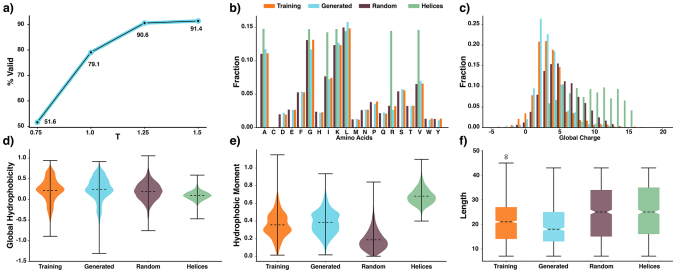

In [16]:
from modlamp.analysis import GlobalAnalysis
from modlamp.core import count_aas
from modlamp.descriptors import PeptideDescriptor, GlobalDescriptor
from modlamp.sequences import Random, Helices
from scipy.spatial import distance

sequences = []
for seq in df['seq']:
    sequences.append(seq)

class modlamp_analyzer:

    def __init__(self, sequences, generated):
        self.sequences = sequences
        self.generated = generated
        self.count = len(set(self.generated) & set(self.sequences))
        self.d = GlobalDescriptor(self.generated)
        self.len1 = len(self.d.sequences)
        self.d.filter_aa('b')
        self.len2 = len(self.d.sequences)
        self.d.length()

        self.descriptor = 'pepcats'
        self.seq_desc = PeptideDescriptor([s[1:].rstrip() for s in self.sequences], self.descriptor)
        self.seq_desc.calculate_autocorr(7)
        self.gen_desc = PeptideDescriptor(self.d.sequences, self.descriptor)
        self.gen_desc.calculate_autocorr(7)

        # random comparison set
        self.ran = Random(len(self.generated), np.min(self.d.descriptor), np.max(self.d.descriptor))  # generate rand seqs
        self.probas = count_aas(''.join(self.seq_desc.sequences)).values()  # get the aa distribution of training seqs
        self.ran.generate_sequences(proba=list(self.probas))
        self.ran_desc = PeptideDescriptor(self.ran.sequences, self.descriptor)
        self.ran_desc.calculate_autocorr(7)

        # amphipathic helices comparison set
        self.hel = Helices(len(self.generated), np.min(self.d.descriptor), np.max(self.d.descriptor))
        self.hel.generate_sequences()
        self.hel_desc = PeptideDescriptor(self.hel.sequences, self.descriptor)
        self.hel_desc.calculate_autocorr(7)

        self.scalename = 'eisenberg'
        self.uh_seq = PeptideDescriptor(self.seq_desc.sequences, self.scalename)
        self.uh_seq.calculate_moment()
        self.uh_gen = PeptideDescriptor(self.gen_desc.sequences, self.scalename)
        self.uh_gen.calculate_moment()
        self.uh_ran = PeptideDescriptor(self.ran_desc.sequences, self.scalename)
        self.uh_ran.calculate_moment()
        self.uh_hel = PeptideDescriptor(self.hel_desc.sequences, self.scalename)
        self.uh_hel.calculate_moment()


    


/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


/usr/local/lib/python3.6/site-packages/modlamp/analysis.py:300: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  counts, bins = np.histogram(c, range=[-5, 20], bins=25, normed=True)


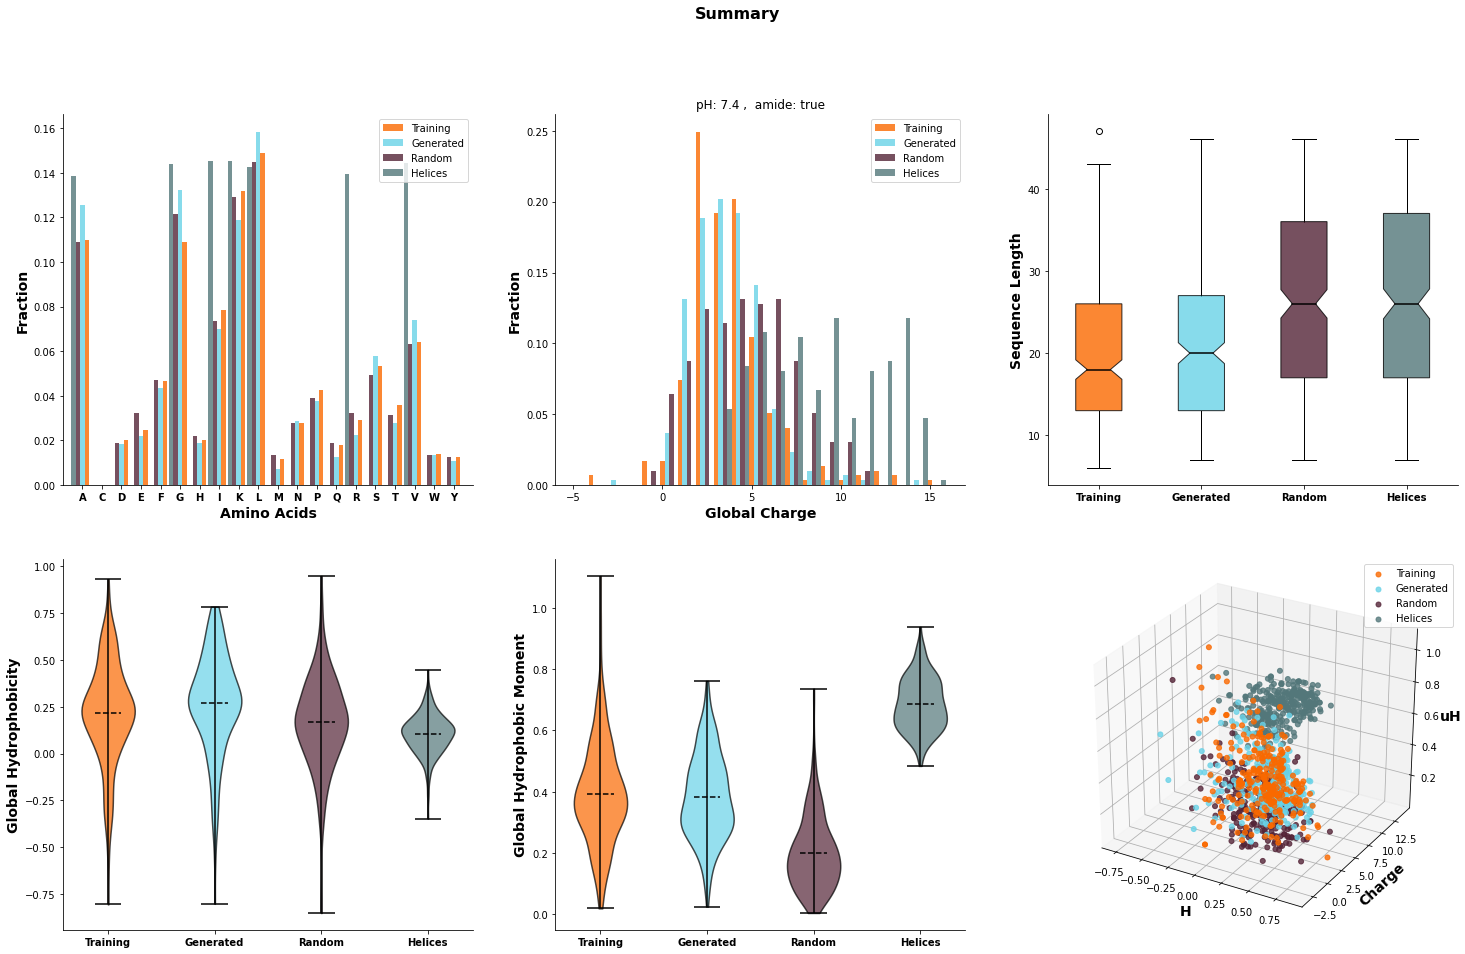

In [115]:
analyzed = modlamp_analyzer(sequences, generated)
_r, _h = analyzed.ran.sequences, analyzed.hel.sequences
ln = min(len(analyzed.uh_seq.sequences), len(analyzed.uh_gen.sequences), len(analyzed.uh_ran.sequences), len(analyzed.uh_hel.sequences))
a = GlobalAnalysis([analyzed.uh_seq.sequences[:ln], analyzed.uh_gen.sequences[:ln], analyzed.uh_ran.sequences[:ln], analyzed.uh_hel.sequences[:ln]], ['Training', 'Generated', 'Random', 'Helices'])
a.plot_summary(filename='fig5.png')

In [0]:
no_seq = 300
for temp in [0.75, 1.25, 1.5]:
    temperature = temp
    genseq = gen_seq(model, no_seq, temperature)
    figureA.append(genseq)


In [0]:
figure_data = []
for idx in [1, 0, 2, 3]:
    figure_data.append(figureA[idx])


p_valid=[]
for data in figure_data:  
    valid = 0 
    for seq in data:
        if not seq in sequences:
            valid += 1
    p_valid.append(valid/len(data))


(Figure. 5-A) Percentages of valid unique sequences obtained from sampling 300 sequences at different temperatures


Text(0.5, 1.0, 'Figure 5-a')

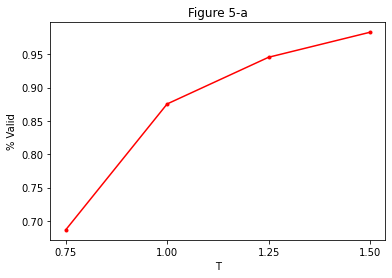

In [123]:
print('(Figure. 5-A) Percentages of valid unique sequences obtained from sampling 300 sequences at different temperatures')

fig = pd.DataFrame(np.array(p_valid))
plt.plot([0.75, 1.0, 1.25, 1.5], p_valid, 'r.-')
plt.xticks([0.75, 1.0, 1.25, 1.5])
plt.xlabel('T')
plt.ylabel('% Valid')
plt.title('Figure 5-a')

If the temperature is low, the generated sequences are more predictable so that the average P(AMP) values are higher, but the sequences are more likely the same as training sequences. If the temperature is high, the generated sequences are more unforeseen and the sequences may not be an AMP (i.e. P(AMP) value may low) so that the sequences are more valid (i.e. not overlap with training sequences)



In [126]:
# from matplotlib import pyplot as plt
# from matplotlib.axes import Axes

# aa = ['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y']

# print('(A) Percentages of valid unique sequences obtained from sampling 300 sequences at different temperatures')

# print('\n(B) Amino acid frequencies')
# aafreq = pd.DataFrame(a.aafreq.T, index=aa, columns=['Training', 'Generated', 'Random', 'Helices'])
# aafreq.plot(kind='bar')
# plt.show()

# print('\n(C) Total charge')
# a.calc_charge()
# ln = min(len(a.charge[0]), len(a.charge[1]), len(a.charge[2]), len(a.charge[3]))
# charge = [a.charge[0][:ln], a.charge[1][:ln], a.charge[2][:ln], a.charge[3][:ln]]
# plot_violin([H[0], H[1], H[2], H[3]], colors=['orange', 'blue', 'purple', 'green'], bp=True, y_min=-1, y_max=1.1)
# print('      Training     Sampled      Random     Helices')

# print('\n(D) Eisenberg hydrophobicity')
# a.calc_H()
# ln = min(len(a.H[0]), len(a.H[1]), len(a.H[2]), len(a.H[3]))
# H = [a.H[0][:ln], a.H[1][:ln], a.H[2][:ln], a.H[3][:ln]]
# plot_violin([H[0], H[1], H[2], H[3]], colors=['orange', 'blue', 'purple', 'green'], bp=True, y_min=-1, y_max=1.1)
# print('      Training     Sampled      Random     Helices')

# print('\n(E) Eisenberg hydrophobic moment')
# a.calc_uH()
# ln = min(len(a.uH[0]), len(a.uH[1]), len(a.uH[2]), len(a.uH[3]))
# uH = [a.uH[0][:ln], a.uH[1][:ln], a.uH[2][:ln], a.uH[3][:ln]]
# plot_violin([uH[0], uH[1], uH[2], uH[3]], colors=['orange', 'blue', 'purple', 'green'], bp=True, y_min=-0.1, y_max=1.1)
# print('      Training     Sampled      Random     Helices')

# print('\n(F) Sequence length')
# seq_len = np.array([len(seq) for seq in sequences])
# gen_len = np.array([len(seq) for seq in generated])
# ran_len = np.array([len(seq) for seq in analyzed.ran.sequences])
# hel_len = np.array([len(seq) for seq in analyzed.hel.sequences])
# plt.boxplot([seq_len, gen_len, ran_len, hel_len], labels=['Training', 'Generated', 'Random', 'Helices'])
# plt.show()

['SLGGFLKGVGKALAGVGKMVADQFGNLLQAGQ',
 'FALLGDFFRKSKEKIGKEFKRIVQRIKDFLRNLVPRTES',
 'KQIKMKLREMVLFT',
 'FIGAIARLLSKIF',
 'KPPAWVP',
 'GLFKTLIKGAGKMLGHVAKQFLGSQGQPES',
 'GMASLLAKVLPHVVKLIK',
 'FLLSLPHLASGLASLVLSK',
 'LLGDFFRKSKEKIGKEFKRIVQR',
 'LLGDLLRKSKEKIGKEFKRIVQRIKDFLRNLVPRTES',
 'SWASMAKKLKEYMEKLKQRA',
 'GIGGKILSGFKTALKGAAKELAFTYLH',
 'GLFSKFAGKGIKNFLNKGVKHIGKE',
 'LLPPWLRPRNG',
 'FILPLIASFLSKFL',
 'RPPGFSPFR',
 'GILDAIKAIAKAAG',
 'IIPLPLGYFAKKT',
 'GLVSSIGRALGGLLADVVKSKEQPA',
 'GIGGALLSAGKSALKGLAKGFAEHF',
 'GIGTKIIGGLKTAVKGALKELAFTYVN',
 'IWLTALKFLGKNLGKHLAKQQLAKL',
 'GLLGMVGSLLGGLGL',
 'GFKDWIKGAAKKLIKTVASSIANE',
 'FLPKLFAGIISKNF',
 'GVGDLIRKAVSVIKNIV',
 'GLFRRLRDSIRRGQQKILEKARRIGERIKDIFRG',
 'GLLSGKSVKGSI',
 'GIGGKILSGLKTALKGAAKELAATYLH',
 'GLFKVLGSVAKHLLPHVVPVIAEK',
 'GLAGAISSVLDKLKQSQLIKNYAKKLGYPR',
 'GLWEKIKEKANELVSGIVEGVK',
 'IFKAIWSGIKSLF',
 'GLFGVLAKVAAHVVPAIAEHF',
 'ILPILSLIGGLLGK',
 'RLGTALPALLKTLLAGLNG',
 'FLSLIPHAINAISAIAHHL',
 'GLWSKIKEAGKAVLTAAGKAALGAVSDAV',
 'AGYSRMI

#### Figure 6

[Notice] Please upload the 'p(amp).xlsx' file which contains the P(AMP) value of original AMP data and generated AMPs.

[Warning] The given file is based on recent experiments. If you run the code again, you need to edit it. Run the following code to obtain the fasta format for each sequence. The name of sequence variable is as follows.


```
# SEQUENCES = generated     # generated sequences
# SEQUENCES = _r.sequences  # random sequences
# SEQUENCES = _h.sequences  # helical sequences

for seq in SEQUENCES:
    print('>')
    print(seq)
```

You should copy and paste the fasta format data to the following link.
http://www.camp3.bicnirrh.res.in/predict/
And obtain the result.

Copy and paste the result to the given file.
You should copy all the columns which are 'Seq. ID., Class, AMP Probability' not including the header.

In [49]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  p_amp = pd.read_excel(fn)

Saving p(amp).xlsx to p(amp).xlsx


Pseudo-probabilities of sequences predicted to be AMPs
(CAMP random forest classifier). Training (orange): training data
(known AMPs); Sampled (blue): sequences newly generated by the
LSTM RNN model; Random (purple): pseudo-random sequences with
the same amino acid probabilities as the training data; Helices (green):
presumed amphipathic helices with repetitive basic residues and
hydrophobic patches.

The above figure is from the reference paper and below result is my own with temperature value of 1.

Reference Paper Figure 6

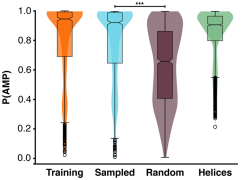

      Training     Sampled      Random     Helices


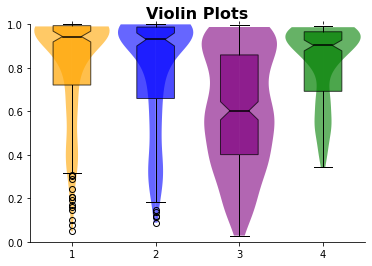

In [104]:
from modlamp.plot import plot_violin

index = list(range(len(p_amp['data_p'])))
random.shuffle(index)

sample_p = np.array(p_amp['sample_p'].dropna())
data_p = np.array(p_amp['data_p'])[index[:len(sample_p)]]
random_p = np.array(p_amp['random_p'].dropna())
hel_p = np.array(p_amp['hel_p'].dropna())


data = [data_p, sample_p, random_p, hel_p]
data = np.array(data)
# print(data.shape)
plot_violin(data, colors=['orange', 'blue', 'purple', 'green'], bp=True, filename='fig6.png')
print('      Training     Sampled      Random     Helices')

The p(AMP) distribution of sampled sequences are similar as training sequences (p-value < 0.01)

#### Figure 7

Helical wheel plots of five top-ranking peptides with P(AMP) = 1 from the sequences generated by the LSTM RNN model. Predictions of
the CAMP random forest classifier were sorted to select the top-ranking sequences. The numbers and corresponding arrows depict Eisenberg’s
hydrophobic moment for the idealized α-helical conformation. The corresponding sequence length is given below the wheels.

The above figure is from the reference paper and below result is my own with temperature value of 1.

Reference Paper Figure 7

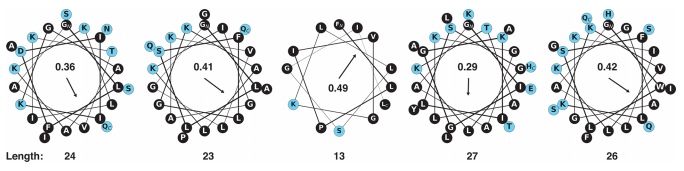

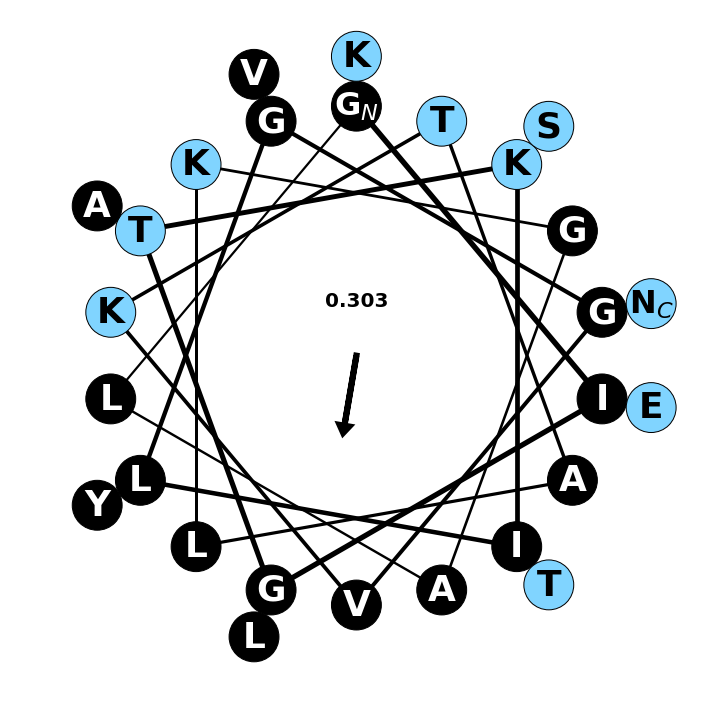

Length:	 27


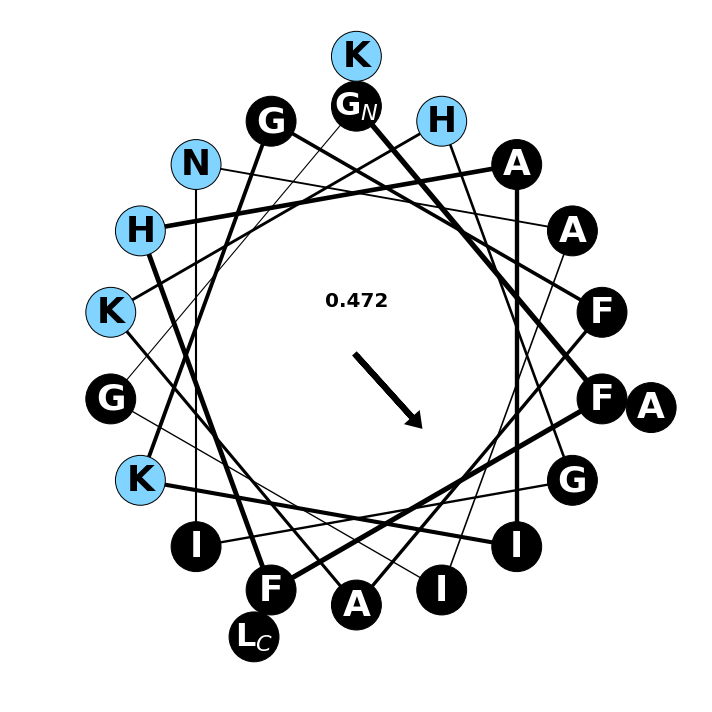

Length:	 21


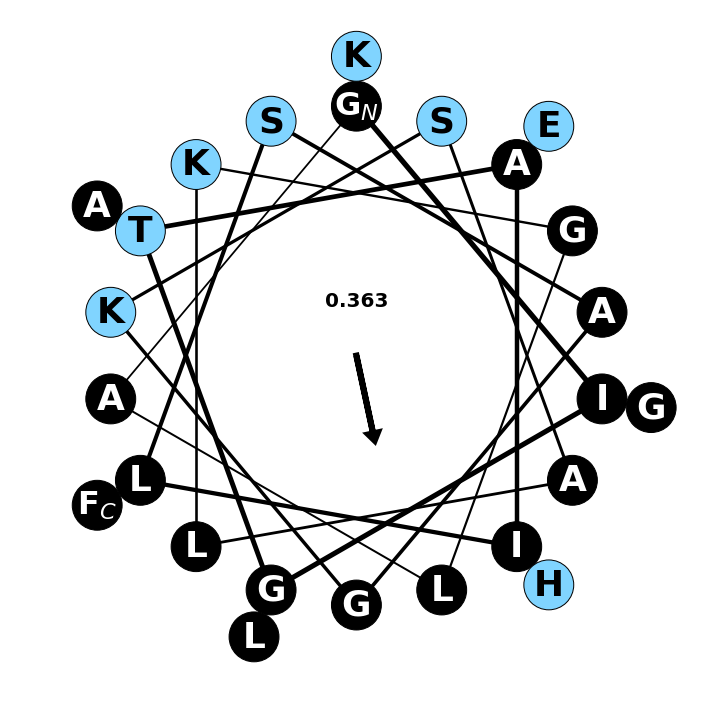

Length:	 25


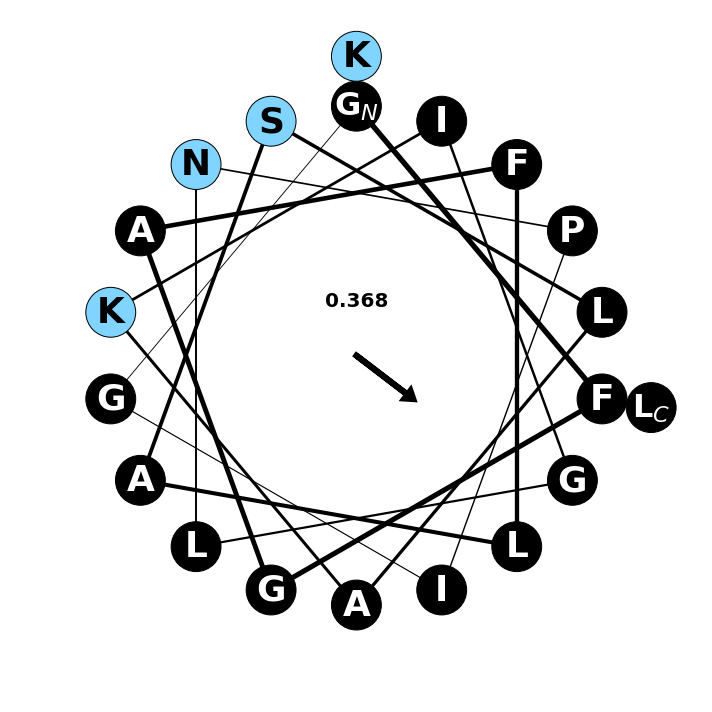

Length:	 20


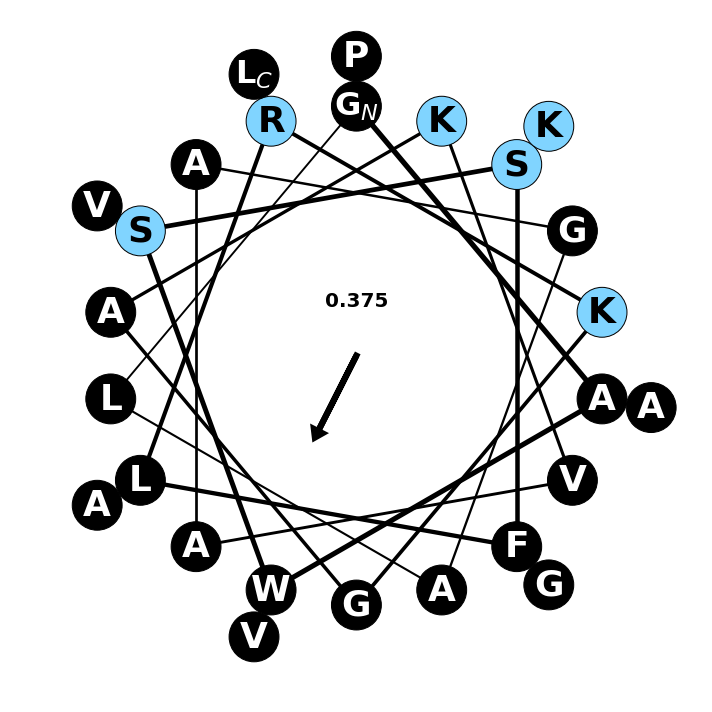

Length:	 26


In [125]:
from modlamp.plot import helical_wheel 

uniq_len = []
top5=[]
idx = 0
while len(uniq_len) < 5:
    idx -= 1
    argidx = np.argsort(np.array(p_amp['sample_p'].dropna()))[idx]
    if not len(generated[argidx]) in uniq_len:
        uniq_len.append(len(generated[argidx]))
        top5.append(argidx)


for top in top5:
    helical_wheel(generated[top], colorcoding='polar', lineweights=True, moment=True)
    print('Length:\t',len(generated[top]))


## 5 Build autoregressive model based on causal CNN

#### build AR model

model architecture



> Conv1D(32, k=5, d=2) -> Conv1D(32, k=10, d=2) -> Conv1D(32, k=10, d=2) -> Dense(64) -> Dropout(0.2) -> Dense_output



fine tuning
* epoch: 10 -> 50 -> 80 -> 50 (loss vibrates at 40s)
* batch: 32 -> 10 -> 30 -> 50 -> 100 -> 50 (at 50, the loss decreasing is stable)
* architecture: double conv layers -> triple conv layers -> triple conv layers with double dense layer -> triple conv layers and double dense layers with dropout
* filter size: (10, 10) -> (5, 10, 10) -> (5, 5, 10) -> (5, 10, 10)
* dilation rate: (2, 2, 2) -> (2, 4, 8) -> (2, 2, 2) (too sparse spatial learning increases loss)
* final layer activation function None -> softmax (so that the log operation applied to the probability when generating sequences)

In [114]:
cnn = tf.keras.Sequential([
                           tf.keras.layers.Conv1D(32, 5, activation='relu', padding='causal', input_shape=(48,21)),
                           tf.keras.layers.Conv1D(64, 10, activation='relu', padding='causal'),
                           tf.keras.layers.Conv1D(128, 10, activation='relu', padding='causal'),
                           tf.keras.layers.Dense(64, activation='relu'),
                           tf.keras.layers.Dropout(0.2),
                           tf.keras.layers.Dense(21, activation='softmax')
])

cnn.compile(optimizer='adam', loss=tf.keras.losses.categorical_crossentropy, metrics=['accuracy'])
cnn.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_5 (Conv1D)            (None, 48, 32)            3392      
_________________________________________________________________
conv1d_6 (Conv1D)            (None, 48, 64)            20544     
_________________________________________________________________
conv1d_7 (Conv1D)            (None, 48, 128)           82048     
_________________________________________________________________
dense_5 (Dense)              (None, 48, 64)            8256      
_________________________________________________________________
dropout_3 (Dropout)          (None, 48, 64)            0         
_________________________________________________________________
dense_6 (Dense)              (None, 48, 21)            1365      
Total params: 115,605
Trainable params: 115,605
Non-trainable params: 0
________________________________________________

In [94]:
CNN_EPOCH = 50
CNN_BATCH = 50

hist = cnn.fit(x=X_train, y=y_train, epochs=CNN_EPOCH, batch_size=CNN_BATCH, validation_split=0.2, callbacks=[checkpoint_callback])

Epoch 1/50
25/25 [==============================] - 0s 13ms/step - loss: 0.4526 - accuracy: 0.8643 - val_loss: 0.7024 - val_accuracy: 0.8239
Epoch 2/50
25/25 [==============================] - 0s 12ms/step - loss: 0.4457 - accuracy: 0.8672 - val_loss: 0.6977 - val_accuracy: 0.8254
Epoch 3/50
25/25 [==============================] - 0s 12ms/step - loss: 0.4387 - accuracy: 0.8685 - val_loss: 0.7026 - val_accuracy: 0.8270
Epoch 4/50
25/25 [==============================] - 0s 12ms/step - loss: 0.4355 - accuracy: 0.8698 - val_loss: 0.7052 - val_accuracy: 0.8257
Epoch 5/50
25/25 [==============================] - 0s 12ms/step - loss: 0.4249 - accuracy: 0.8728 - val_loss: 0.7059 - val_accuracy: 0.8272
Epoch 6/50
25/25 [==============================] - 0s 12ms/step - loss: 0.4236 - accuracy: 0.8725 - val_loss: 0.7148 - val_accuracy: 0.8280
Epoch 7/50
25/25 [==============================] - 0s 13ms/step - loss: 0.4175 - accuracy: 0.8757 - val_loss: 0.7159 - val_accuracy: 0.8276
Epoch 8/50
25

MIN Loss:  0.6844236850738525 	last Loss:  0.6981779336929321


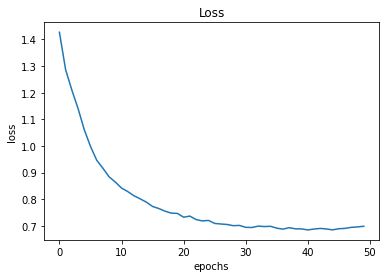

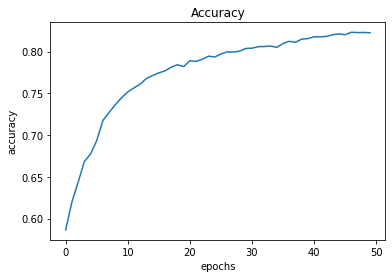

In [90]:
print('MIN Loss: ', min(hist.history['val_loss']), '\tlast Loss: ', hist.history['val_loss'][-1])

plt.plot(range(CNN_EPOCH), hist.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('Loss')
plt.show()

plt.plot(range(CNN_EPOCH), hist.history['val_accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('Accuracy')
plt.show()

#### reproduce result

In [95]:
cnn_generated = gen_seq(cnn, 300, 1.0)

for seq in cnn_generated:
    print('>')
    print(seq)

N/A% (0 of 300) |                        | Elapsed Time: 0:00:00 ETA:  --:--:--


Sampling...



100% (300 of 300) |######################| Elapsed Time: 0:03:19 Time:  0:03:19


	6 sequences were shorter than 7
>
GVGDLFRKAVSTIKNMV
>
FSVVAKVARPGFSALRQPWNP
>
DREAKWRDKFRAVLKVYLNVHQGYASG
>
GIGGALLSAGKSALKGLAKGLAEHF
>
GIGTKFLGGAKTALKGALKELASTYVQ
>
WASLVGLVVNVFHGISEQQ
>
GIGTKFIGGLKTAVKGALKELASTYVN
>
VNGKILRSAIKFGKAELVALPNEI
>
SLFDTAKKVGSVIDDAKRILDAAANLV
>
FLSGIVGILGKLF
>
GLPQFFKGFEQILKEKL
>
GIGTKILGGVKTALKGALKELASTYVN
>
GLLSVLGSVAKHVLPHVVPVIAEHL
>
GVGTFFHKAKSAAKHVGTTF
>
LLPIVGNLLNSLL
>
GFKSFFNGIIKVFLK
>
NIISLIANAIEVIGRILPHIK
>
GMWGHLGKTIGNVLTSLAPSAGVGESL
>
GIGGKILSGLKTALKGAAKELASTYLH
>
AREDQIYWDRLKSDAKKDAEDMGKKKANIVINNMAQ
>
GWGEQFSKVKSKINKLFRKIAKREK
>
RPPGFTPF
>
GLASIFGAALGRLKNGLPIKGKPS
>
GIGTKIIGGLKTAVKGALKELASTYVN
>
FIPALISKVGSKFRK
>
FLSLIPHIVSGVAALAKHFG
>
GIGGALLSAGKSALKGLAKGLAEHF
>
GLVNDLLKTAGGVLTDILGSKLK
>
GLLDGLLGTLGK
>
VIGTFIKVVKKFAPAFLN
>
FFPLILGALGEILPTIF
>
FLPVVGQMIKGVLKILHDYLKV
>
FLPLVASLLGKLL
>
QDDKGKSNWE
>
FLPWIGKIKTK
>
GILDVAKEVVGVLRNLLGEKLKDREQ
>
ILWRTLWRKLKSMAPKFFQTIKKMQQIAGNNLMI
>
NIASGLANKK
>
GIGGVLWKALKAALKGLAKVLANTYQK
>
VHKEKIVGTRAKHISNLAEKIWDA
>

###### Figure 5

/usr/local/lib/python3.6/site-packages/modlamp/analysis.py:300: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  counts, bins = np.histogram(c, range=[-5, 20], bins=25, normed=True)


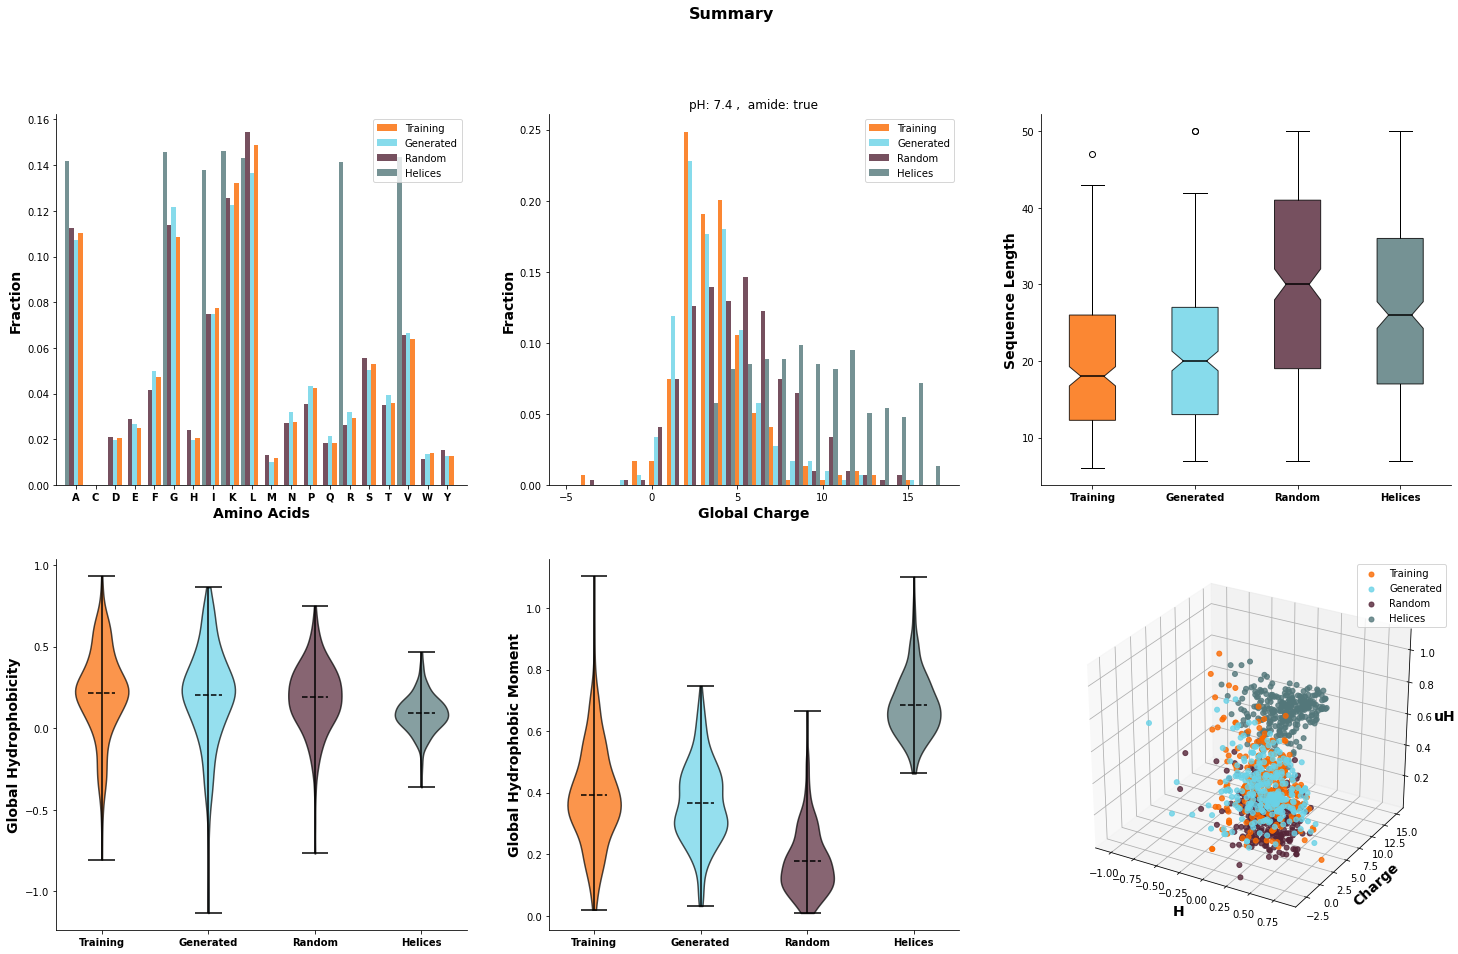

In [101]:
analyzed = modlamp_analyzer(sequences, cnn_generated)
_r, _h = analyzed.ran.sequences, analyzed.hel.sequences
ln = min(len(analyzed.uh_seq.sequences), len(analyzed.uh_gen.sequences), len(analyzed.uh_ran.sequences), len(analyzed.uh_hel.sequences))
a = GlobalAnalysis([analyzed.uh_seq.sequences[:ln], analyzed.uh_gen.sequences[:ln], analyzed.uh_ran.sequences[:ln], analyzed.uh_hel.sequences[:ln]], ['Training', 'Generated', 'Random', 'Helices'])
a.plot_summary()

summary plot that generated from RNN sequence generator


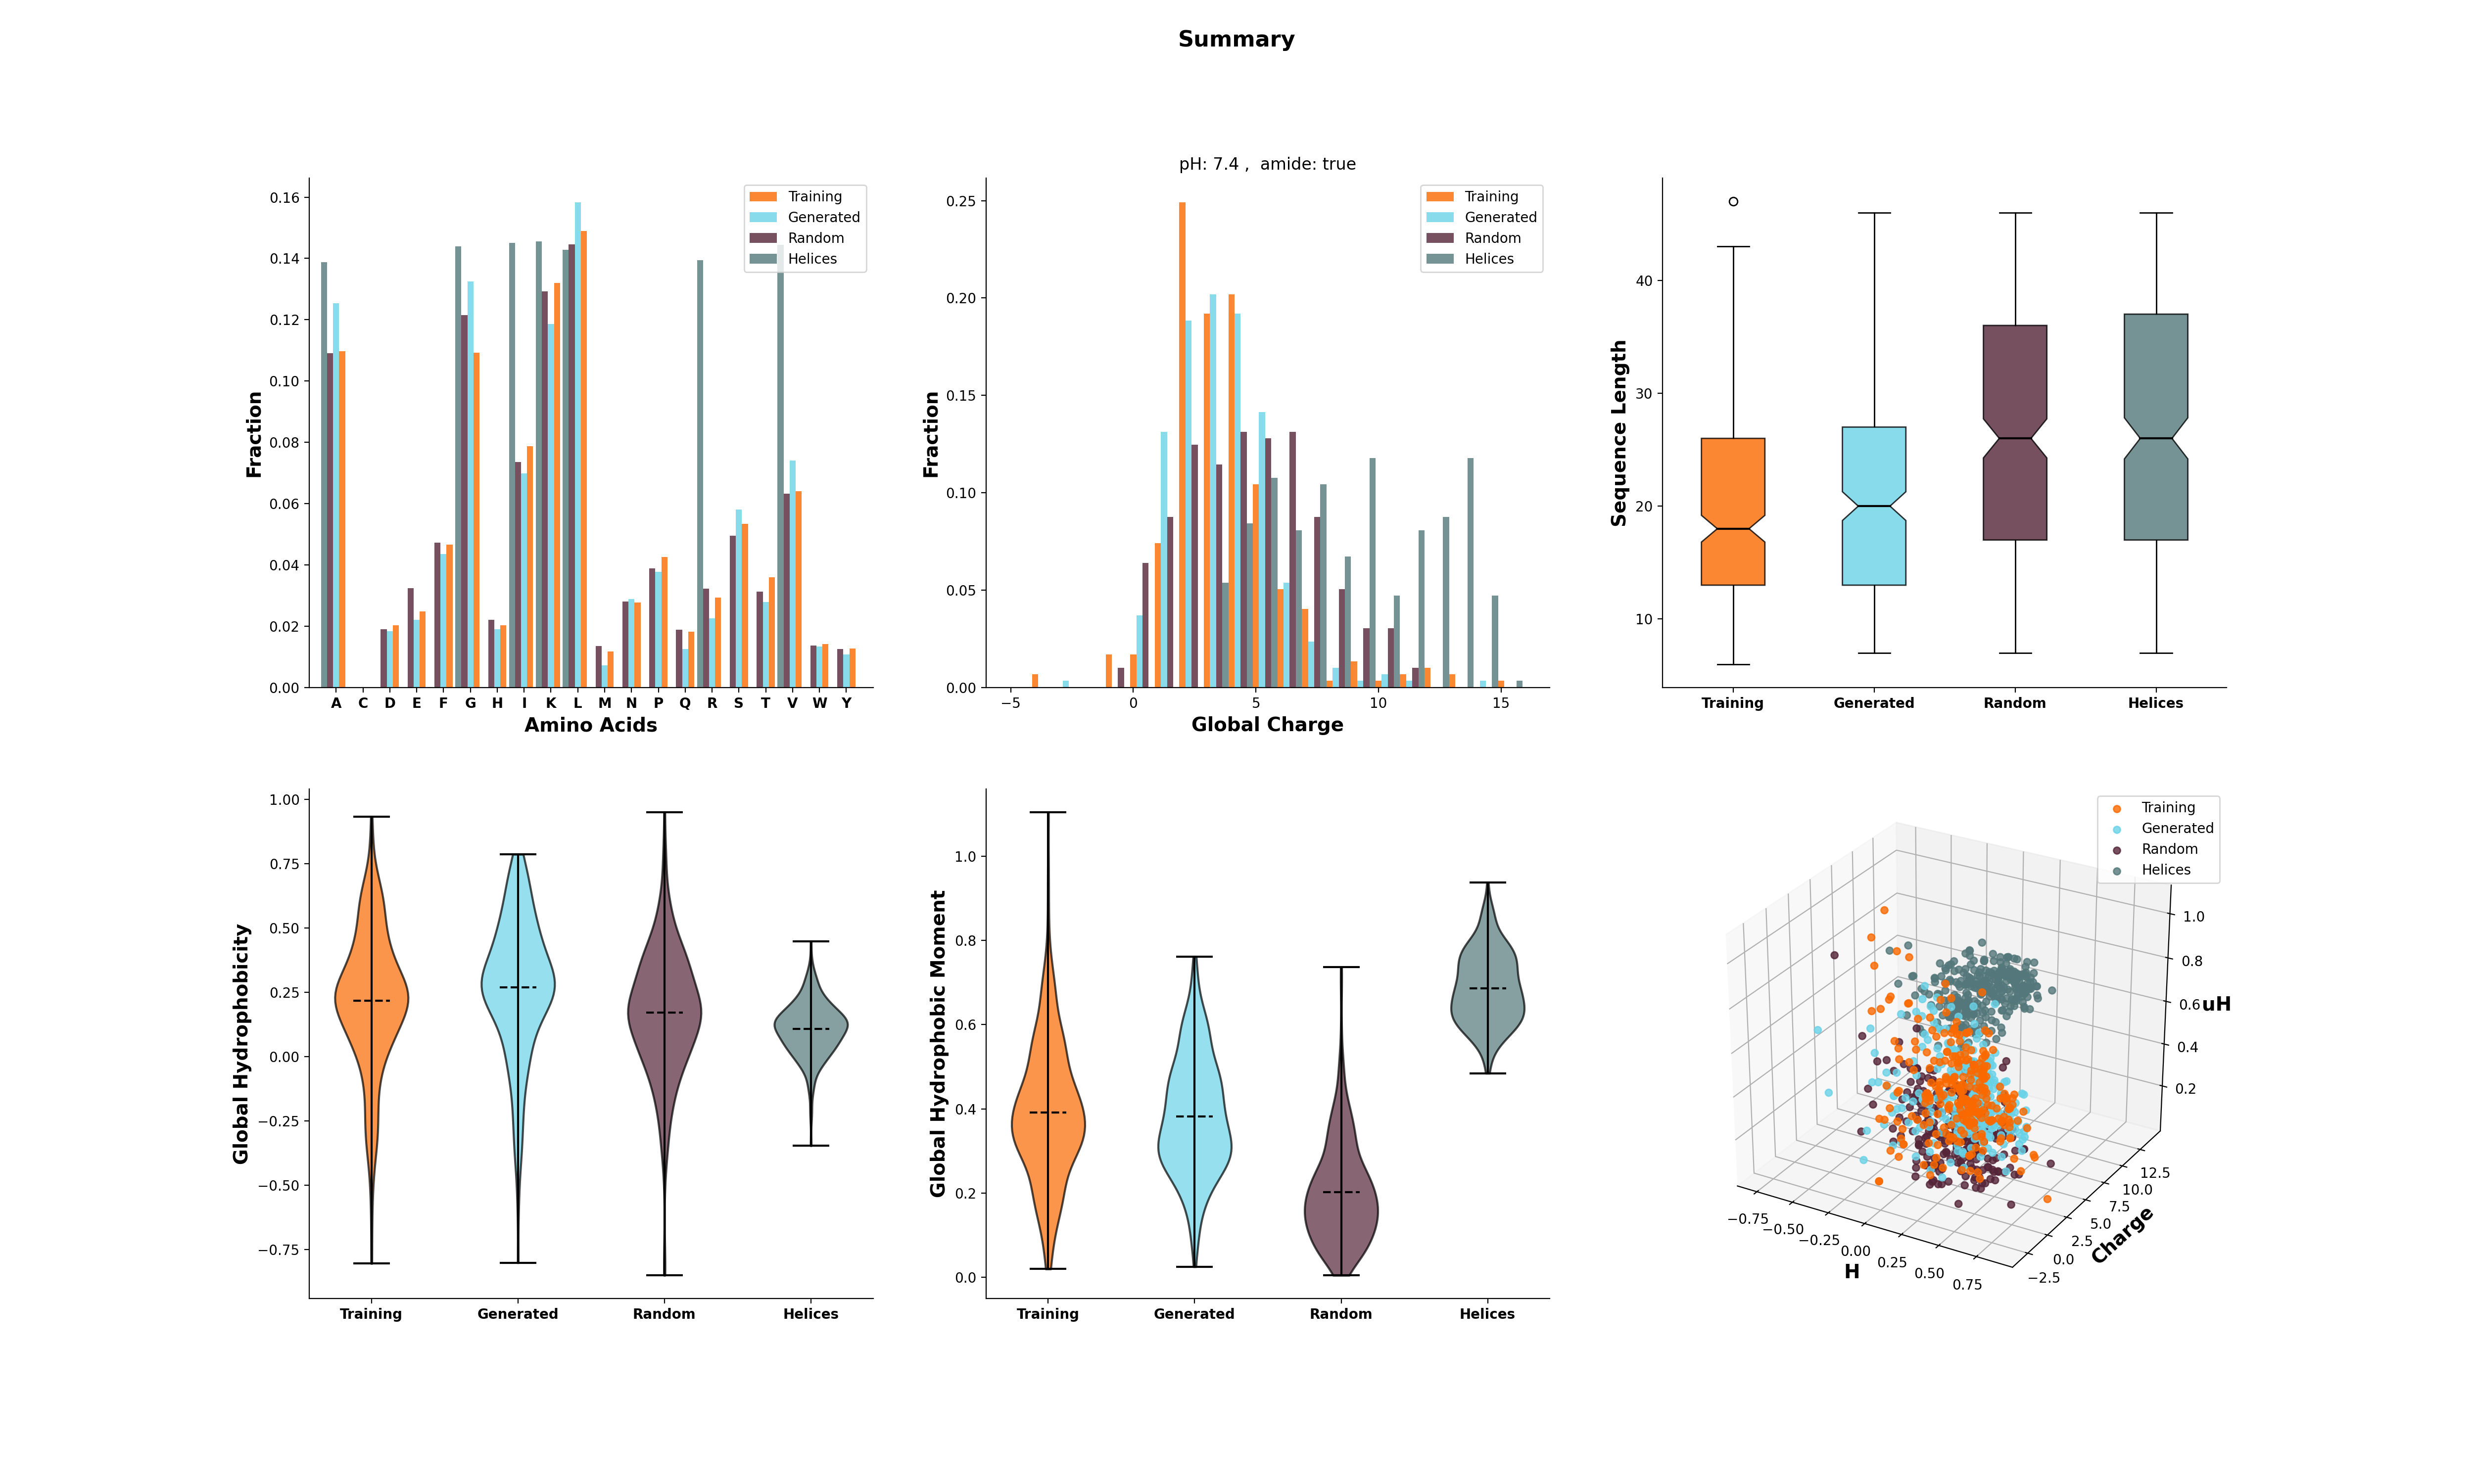

In [116]:
print('summary plot that generated from RNN sequence generator')
from PIL import Image
im = Image.open('fig5.png')
im

From the summary plot, we can see that the generated cnn model produces almost same distribution of amino acid occurance, global charge, sequence length, global hydrophobicity, global hydrophobic moment. (p-value < 0.05)

In [64]:
no_seq = 300
figureA_cnn = []
figureA_cnn.append(cnn_generated)
for temp in [0.75, 1.25, 1.5]:
    temperature = temp
    genseq = gen_seq(cnn, no_seq, temperature)
    figureA_cnn.append(genseq)


N/A% (0 of 300) |                        | Elapsed Time: 0:00:00 ETA:  --:--:--


Sampling...



100% (300 of 300) |######################| Elapsed Time: 0:03:15 Time:  0:03:15
N/A% (0 of 300) |                        | Elapsed Time: 0:00:00 ETA:  --:--:--

	1 sequences were shorter than 7

Sampling...



100% (300 of 300) |######################| Elapsed Time: 0:02:56 Time:  0:02:56
N/A% (0 of 300) |                        | Elapsed Time: 0:00:00 ETA:  --:--:--

	5 sequences were shorter than 7

Sampling...



100% (300 of 300) |######################| Elapsed Time: 0:02:55 Time:  0:02:55


	10 sequences were shorter than 7


In [0]:
figure_data_cnn = []
for idx in [1, 0, 2, 3]:
    figure_data_cnn.append(figureA_cnn[idx])


p_valid_cnn=[]
for data in figure_data_cnn:  
    valid = 0 
    for seq in data:
        if not seq in sequences:
            valid += 1
    p_valid_cnn.append(valid/len(data))

(Figure. 5-A) Percentages of valid unique sequences obtained from sampling 300 sequences at different temperatures


Text(0.5, 1.0, 'Figure 5-a')

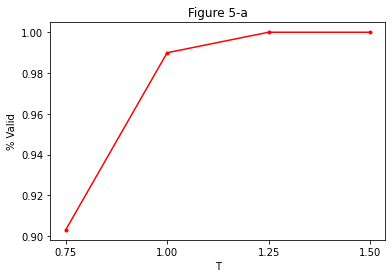

In [66]:
print('(Figure. 5-A) Percentages of valid unique sequences obtained from sampling 300 sequences at different temperatures')

plt.plot([0.75, 1.0, 1.25, 1.5], p_valid_cnn, 'r.-')
plt.xticks([0.75, 1.0, 1.25, 1.5])
plt.xlabel('T')
plt.ylabel('% Valid')
plt.title('Figure 5-a')

###### Figure 6

[Notice] Please upload the 'cnn_p(amp).xlsx' file which contains the P(AMP) value of original AMP data and generated AMPs.

[Warning] The given file is based on recent experiments. If you run the code again, you need to edit it. Run the following code to obtain the fasta format for each sequence. The name of sequence variable is as follows.


```
# SEQUENCES = cnn_generated     # generated sequences
# SEQUENCES = _r.sequences  # random sequences
# SEQUENCES = _h.sequences  # helical sequences

for seq in SEQUENCES:
    print('>')
    print(seq)
```

You should copy and paste the fasta format data to the following link.
http://www.camp3.bicnirrh.res.in/predict/
And obtain the result.

Copy and paste the result to the given file.
You should copy all the columns which are 'Seq. ID., Class, AMP Probability' not including the header.

In [98]:
uploaded = files.upload()

for fn in uploaded.keys():
  cnn_p_amp = pd.read_excel(fn)

Saving cnn_p(amp).xlsx to cnn_p(amp).xlsx


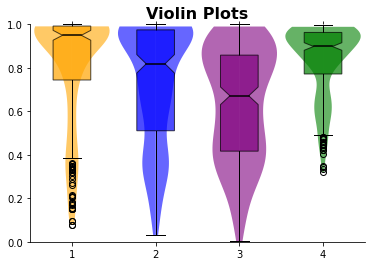

      Training     Sampled      Random     Helices


In [99]:
index = list(range(len(p_amp['data_p'])))
random.shuffle(index)

sample_p = np.array(cnn_p_amp['sample_p'].dropna())
data_p = np.array(cnn_p_amp['data_p'])[index[:len(sample_p)]]
random_p = np.array(cnn_p_amp['random_p'].dropna())
hel_p = np.array(cnn_p_amp['hel_p'].dropna())


data = [data_p, sample_p, random_p, hel_p]
data = np.array(data)
# print(data.shape)
plot_violin(data, colors=['orange', 'blue', 'purple', 'green'], bp=True)
print('      Training     Sampled      Random     Helices')

violin plot that generated from RNN sequence generator
Yellow=Training	Blue=Sampled	Purple=Random	Green=Helices


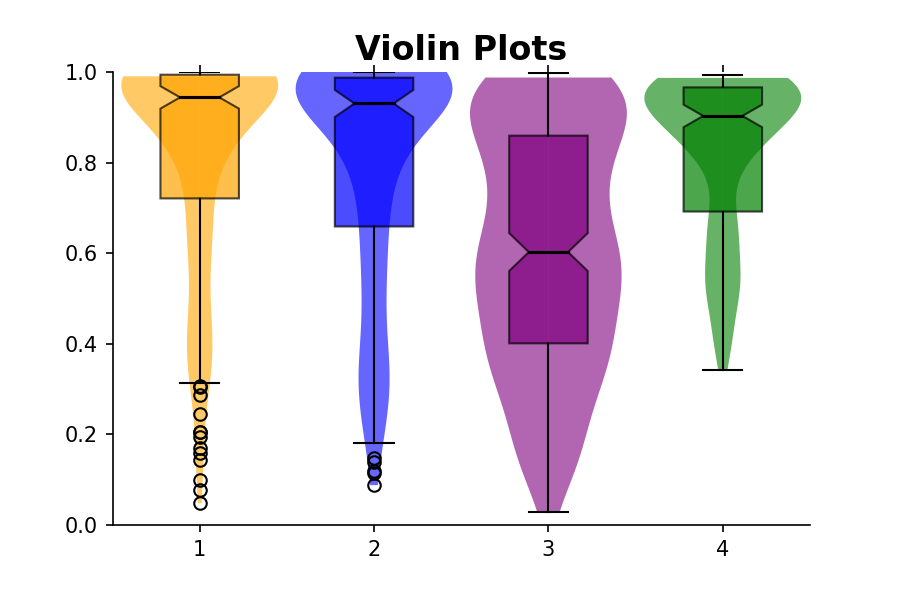

In [112]:
print('violin plot that generated from RNN sequence generator')
print('Yellow=Training\tBlue=Sampled\tPurple=Random\tGreen=Helices')
from PIL import Image
im = Image.open('fig6.png')
im

From the plot from AR model and RNN model, we can see that the distribution of sequence is almost the same.

However, plot for generated sample of AR model has broader distribution. 
The reason is, RNN model sequentially receives the input sequence and calculate each hidden state of amino acid one-by-one.
The AR model uses the dilated filter that receive and calculate a bunch of sequences so that the temporal receptive field is larger than RNN.
Thus, the probability of generating wrong (not AMP) sequence increases because AR model does not learn the right next amino acid but learn occurance of amino acid that fit from overall structure so far.

###### Figure 7

Length:	 27


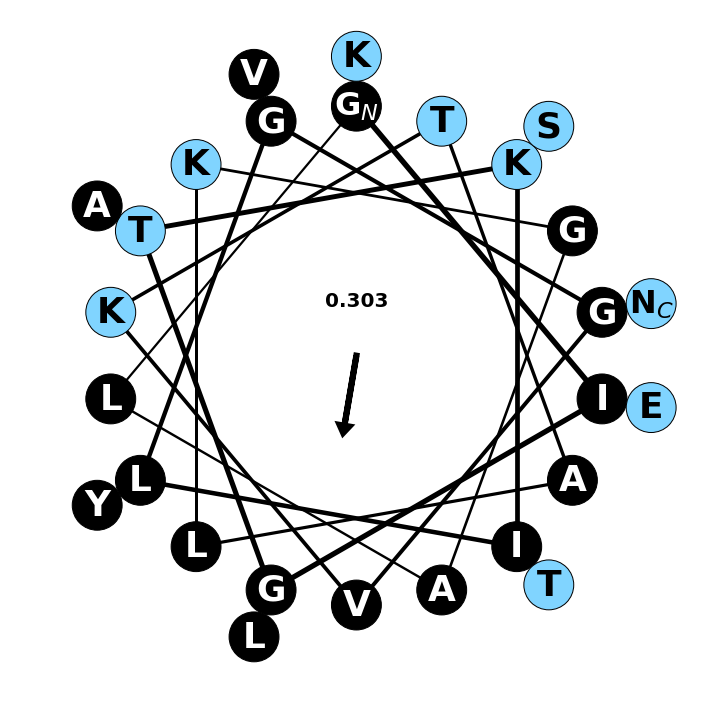

Length:	 23


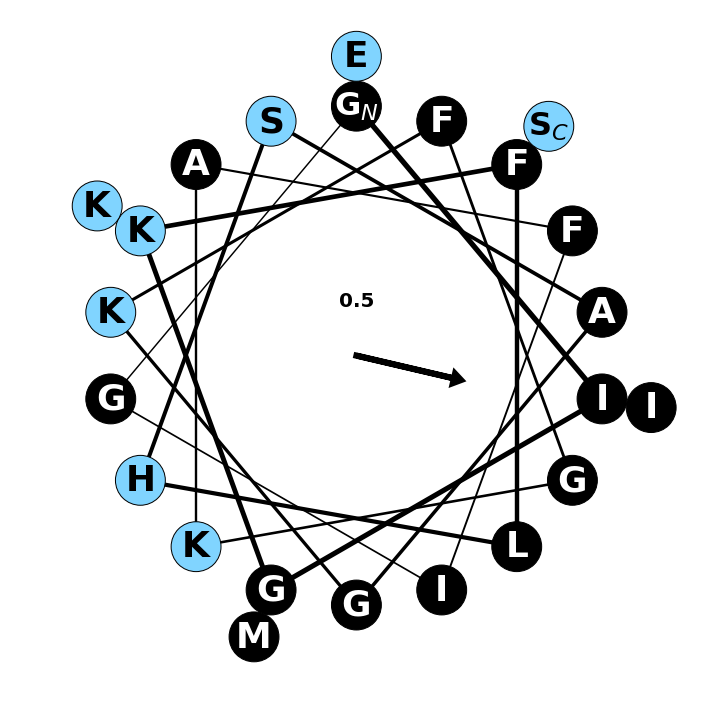

Length:	 25


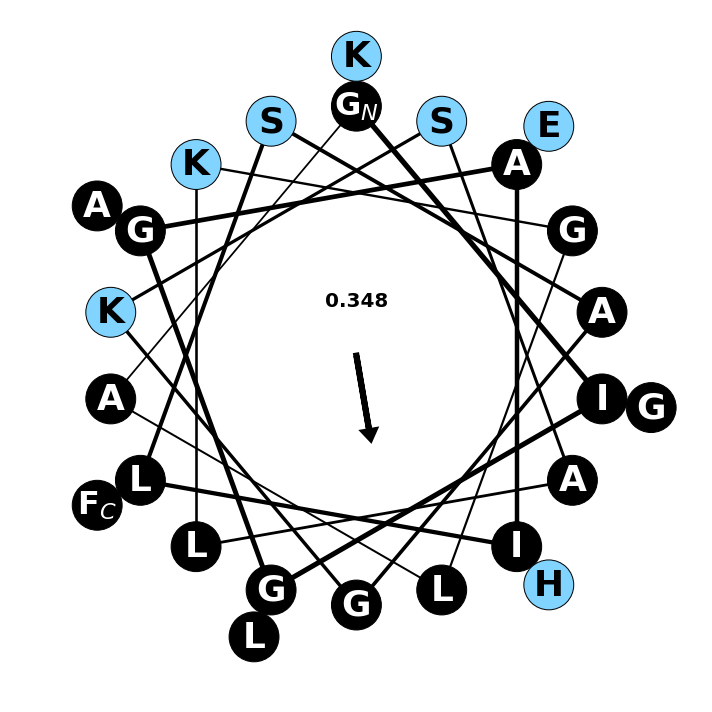

Length:	 21


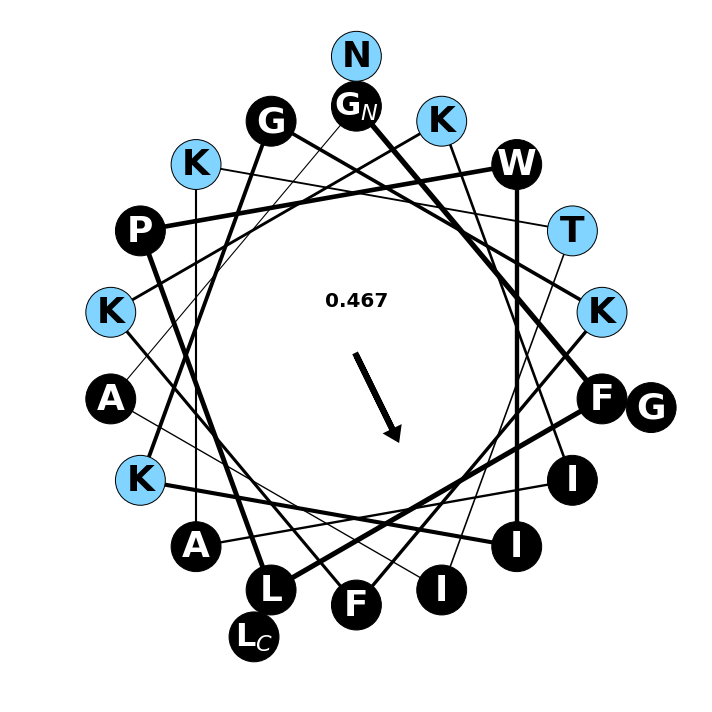

Length:	 13


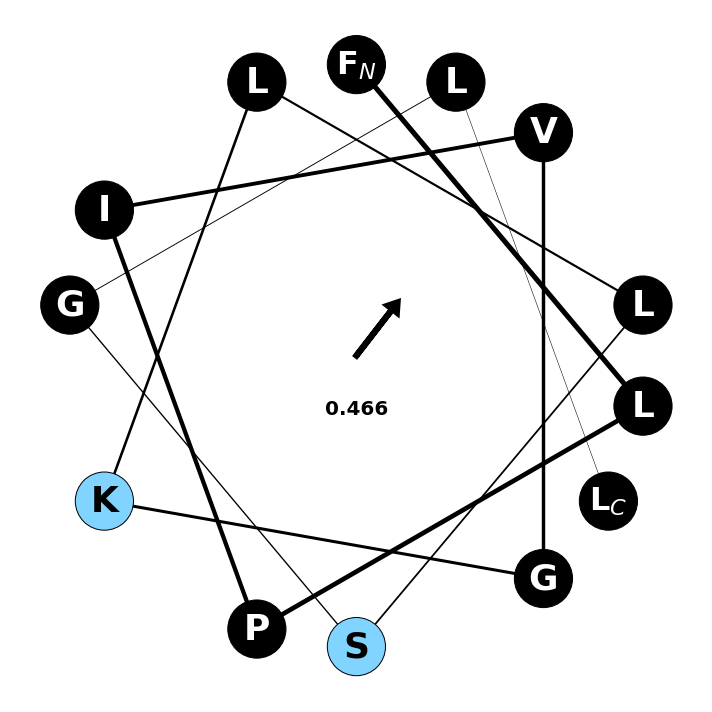

In [124]:
top5 = []
uniq_len = []
top5=[]
idx = 0
while len(uniq_len) < 5:
    idx -= 1
    argidx = np.argsort(np.array(cnn_p_amp['sample_p'].dropna()))[idx]
    if not len(cnn_generated[argidx]) in uniq_len:
        uniq_len.append(len(cnn_generated[argidx]))
        top5.append(argidx)


for top in top5:
    print('Length:\t',len(cnn_generated[top]))
    helical_wheel(cnn_generated[top], colorcoding='polar', lineweights=True, moment=True)

## 6 Discussion